In [1]:
from skimage import io
from pycocotools.coco import COCO
import os
from PIL import Image as pil_img
import numpy as np
from matplotlib import pyplot as plt
import cv2
from huggingface_hub import HfApi


from datasets import Dataset, DatasetDict, Image
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# create masks from annotations

coco = COCO('data/annotations/graffiti.json')
img_dir = 'data/imgs/'
catIds = coco.getCatIds(catNms=['graf'])
imgIds = coco.getImgIds(catIds=catIds)

for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    image = pil_img.open(os.path.join(img_dir, img['file_name']))
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    mask = coco.annToMask(anns[0])
    for i in range(len(anns)):
        mask += coco.annToMask(anns[i])

    mask = np.where(mask != 0, 1, 0)

    cv2.imwrite(os.path.join('data/masks/', img['file_name'][:-4]+'.png'), mask)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
# clean imgs directory of imgs with no annotations
imgIds = coco.getImgIds(catIds=catIds)
dirs = []
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    dir = os.path.join(img_dir, img['file_name'])
    dirs.append(dir)

img_dir_path = 'data/imgs/'
for img_filename in os.listdir(img_dir_path):
     img_filepath = img_dir + img_filename
     if img_filepath not in dirs:
          print(img_filepath)
          os.remove(img_filepath)

# clean imgs with non 960x640 shapes
# for imgId in imgIds:
#     img = coco.loadImgs(imgId)[0]
#     width = img['width']
#     height = img['height']
#     if width != 960 and height != 640:
#           print(width, height)
#           dir = os.path.join(img_dir, img['file_name'])
#           print(dir)
#           if os.path.exists(dir):
#             os.remove(dir)
    # dirs.append(dir)

In [4]:
img_paths = []
label_paths = []
img_dir_path = 'data/imgs/'
masks_dir_path = 'data/masks/'

for img_filename in os.listdir(img_dir_path):
    img_paths.append(os.path.join(img_dir_path, img_filename))
print(len(img_paths))

for label_filename in os.listdir(masks_dir_path):
    label_paths.append(os.path.join(masks_dir_path, label_filename))
print(len(label_paths))

def create_dataset(image_paths, label_paths):
    dataset = Dataset.from_dict({"image": sorted(image_paths),
                                "label": sorted(label_paths)})
    dataset = dataset.cast_column("image", Image())
    dataset = dataset.cast_column("label", Image())
    return dataset

data = create_dataset(img_paths, label_paths)

120
120


Pushing dataset shards to the dataset hub: 100%|██████████| 1/1 [00:00<00:00, 16912.52it/s]


In [ ]:
# Upload dataset
# dataset = DatasetDict({"data": data})
# dataset.push_to_hub("Adriatogi/graffiti")

In [64]:
import json

id2label = {0: 'not_graf', 1: 'graf'}
with open('id2label.json', 'w') as fp:
    json.dump(id2label, fp)



In [2]:
api = HfApi()
api.upload_file(
    path_or_fileobj="id2label.json",
    path_in_repo="id2label.json",
    repo_id="Adriatogi/graffiti",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/Adriatogi/graffiti/commit/e14d2f60034b27bf3e53cd5b14a80afcf48fab4e', commit_message='Upload id2label.json with huggingface_hub', commit_description='', oid='e14d2f60034b27bf3e53cd5b14a80afcf48fab4e', pr_url=None, pr_revision=None, pr_num=None)

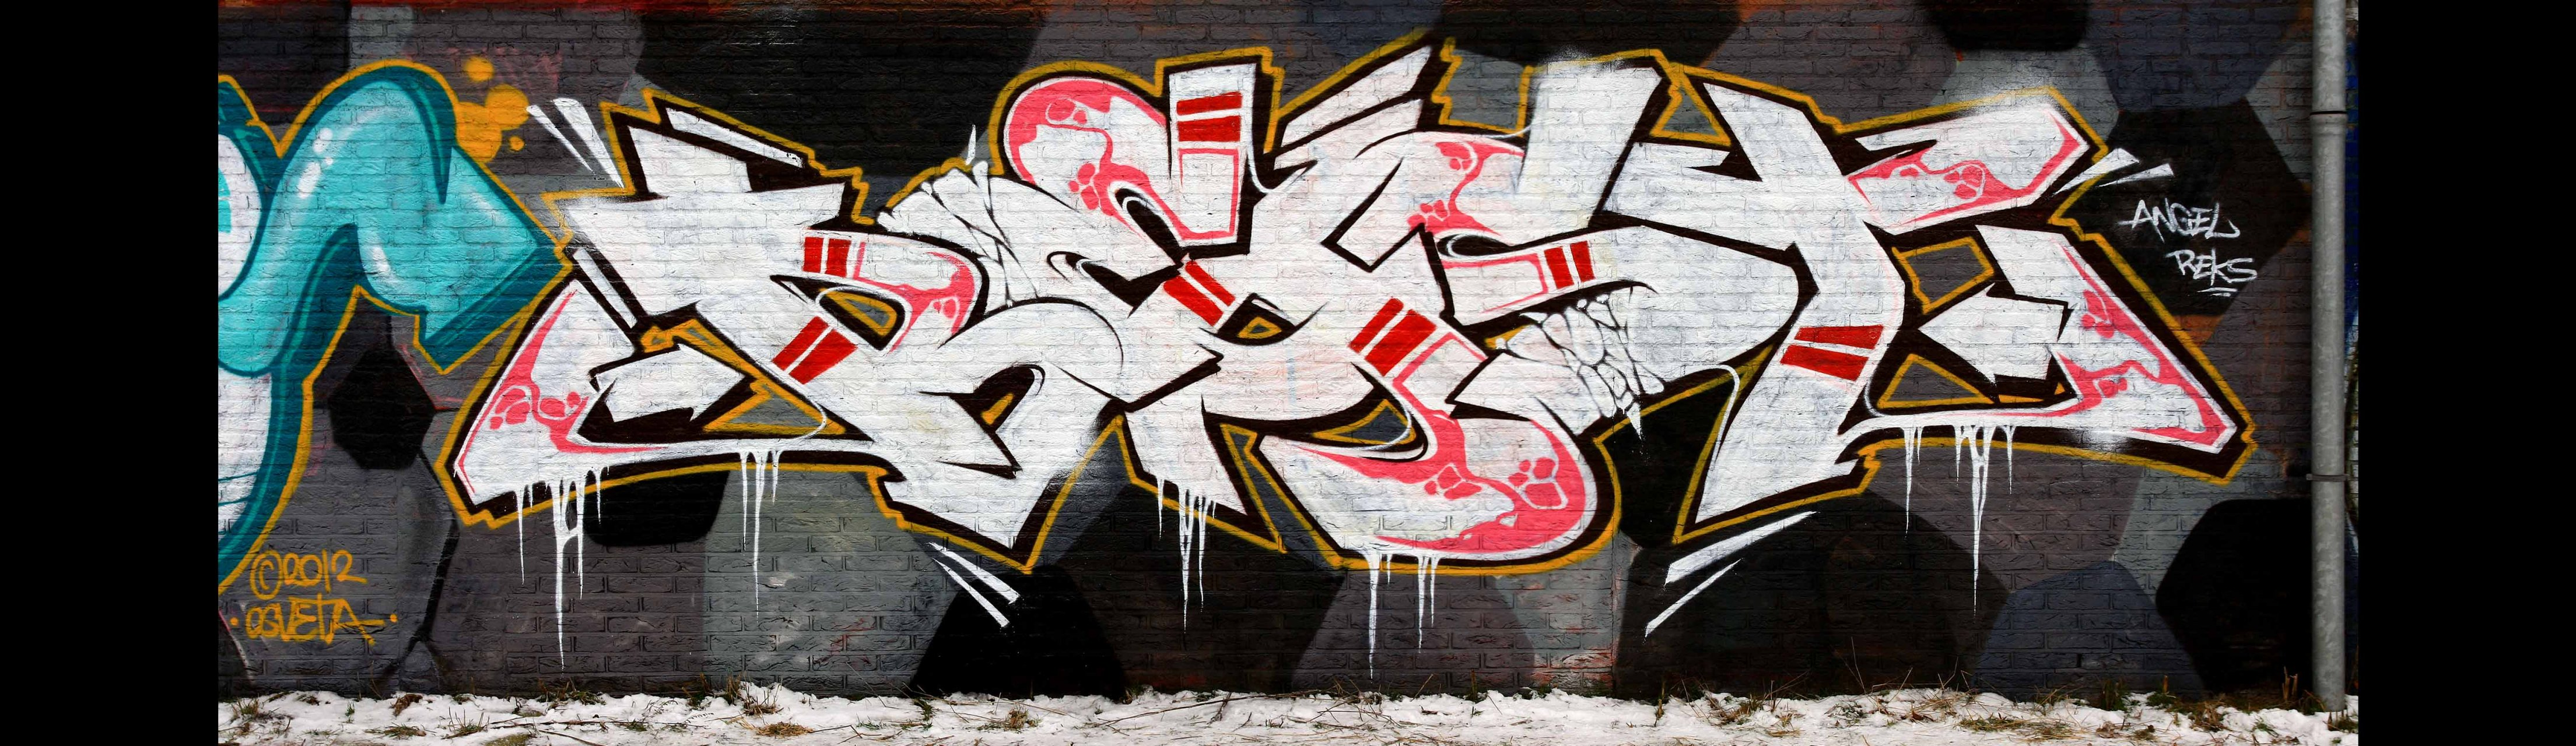

In [42]:
dataset['data']['image'][10]

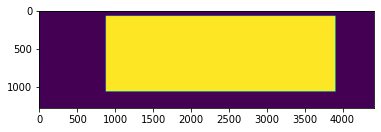

In [43]:
plt.imshow(dataset['data']['label'][9])

In [61]:
dataset['data']['image']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4417x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4417x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x640>,
 <PIL.